# MIDS UC Berkeley - Machine Learning at Scale
## DATSCIW261 ASSIGNMENT #6  

[James Gray](https://github.com/jamesgray007)   
jamesgray@ischool.berkeley.edu   
Time of Initial Submission: 08:50 PM US Central, Friday, June 24, 2016  
Time of **Resubmission**:  
W261-1, Spring 2016  
Week 6 Homework

In [47]:
# Code modules for notebook

# the autoreload will "reload" the MRJob code with the latest changes
%load_ext autoreload
%autoreload 2

# inline will render matplotlib charts inside the notebook
%matplotlib inline

import numpy as np
import pylab as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# HW6.0 - Mathematical Optimization

**_In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe._**

Mathematical optimization is the selection of a best element (with regard to some criteria) from some set of available alternatives. In the simplest case, an optimization problem consists of maximizing or minimizing a real function by systematically choosing input values from within an allowed set and computing the value of the function. 

![opt](img/optimize.png)

While I have not worked hands-on these directly, here are a few optimization examples from previous organizations. At Chevron, the objective was to make various grades of gasoline with the components at least cost and not exceeding the octane rating. These were real-time optimization models that controlled the mixtures of various streams of components.  The decisions variables where the component quantities for each material that would be combined to create gasoline at a specific octane rating. At Microsoft, we ran optimization models to determine how we would route and assign a customer support case to a specific agent queque. The objective was to minimize time by assigning the case to the agent with the right level of product knowledge, customer knowledge, language and availablity to solve the case. These form the decision variables including others such as satisfaction rating, geography and contract cost (per minute).  


# HW6.1 - Optimization Theory

**_For unconstrained univariate optimization what are the first order Necessary Conditions for Optimality (FOC)? _**

The FOC is the first derivative of the objective function will be equal to zero for the input value x and this represents the maximum and minimum values of the objective function.  The following equation represents this mathematically:

$$
f'(x=x*)=0 \tag{First-order condition}
$$

The first derivative is middle graph below where x = -2, 2


**_What are the second order optimality conditions (SOC)? Give a mathematical defintion. Also in python, plot the univartiate function X^3 -12x^2-6 defined over the real  domain -6 to +6. _**

The SOC conditions determine if the "roots" determined by the first order condition (first derivative) are the local maximum or minimum by taking the second derivative of the objective function.  The SOC is represented in the bottom part of the picture below.  The local maximum for the objective function exists when the second derivative is negative and the local minumum exists when the second derivative is positive.  

![soc](img/foc.png)




**_Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs. Justify your responses using the FOC and SOC._**

The optimal points for the local minimum and maximum are when the 1st derivative (green line in plot below) passes through the x axis. We also need to look at the 2nd derivative to determine if each point is a maximum or minimum.  The candidate optimal points are x = 0 and x=8.  The objective function maximum is 0 given that the 2nd derivative is negative at point while the local minimum is 8 give that the 2nd derivative is positive at that point.

**_For unconstrained multi-variate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. What is the Hessian matrix in this context?_**

In this scenario we have many dimensions to determine the first and second order conditions. We set the gradient of the multivariate objective function equal to zero to determine the maximum and minimum optimal points. Here the gradient function are represented by partial derivatives of the input values as shown below.

![nabla](img/nabla.png)

The Hessian matrix represents the partial second derivatives of the objective function.

![hessian](img/hessian.png)

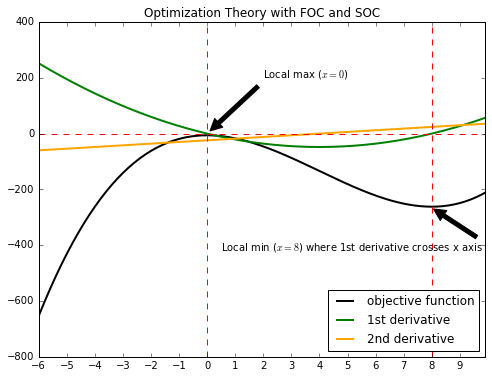

In [45]:
# in this example we will plot an objective function f(x)=x^3-12x-6 over a domain of -6 to 6.

def f(x):
    """The objective function"""
    return x**3-12*x**2-6

def foc(x):
    """The first order condition is the 1st derivative of the objective function"""
    return 3*x**2-24*x

def soc(x):
    """The second order condition is the 2nd derivative of the objective function"""
    return 6*x-24

def rootplot():
    
    # Vectors for x, first derivative, second derivative
    x=np.arange(-6,10,.1)
    y0=f(x)
    y1=foc(x)
    y2=soc(x)

    #Plot each vector 
    fg = plt.figure(figsize=(8,6))
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.plot(x,y0, color="black", label='objective function', linewidth = 2.0)
    plt.plot(x,y1, color="green", label='1st derivative', linewidth = 2.0)
    plt.plot(x,y2, color="orange", label='2nd derivative', linewidth = 2.0)
    plt.legend(loc='lower right')
    plt.title("Optimization Theory with FOC and SOC")
    
    #Plot dotted lines at each root and where x=0
    plt.axhline(0, color ="red", ls = '--', )
    plt.axvline(0, color ="red", ls = '--')
    plt.axvline(8, color = "red", ls = '--')
    
    # comments for the local max and local min
    plt.annotate('Local max ($x=0$)', xy=(0, 0), xytext=(2, 200),arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate('Local min ($x=8$) where 1st derivative crosses x axis', xy=(7.97, -264), xytext=(.5, -420),
        arrowprops=dict(facecolor='black', shrink=0.05),
        )
    
    # show the plot with the 3 curves
    plt.show()
    
rootplot()

# HW6.2 - Newton-Raphson Method to Calculate Roots

**_Taking x=1 as the first approximation(xt1) of a root of X^3 + 2x -4 = 0, use the Newton-Raphson method to calculate the second approximation (denoted as xt2) of this root. (Hint the solution is xt2=1.2)_**

![newton](img/newton.png)

In [35]:
from __future__ import division

# this code will perform the Newton-Raphson method to calculate the roots for the gradient function. In this example,
# we will start with the first approximation equal to 1 and calculate the second iteration.

def f(x):
    """Calculate the value of our objective function"""
    return x**3+2*x-4

def foc(x):
    """Calculate the first order condition - 1st derivative"""
    return 3*x**2+2

def iterate_newton(xt1):
    """Calculate a single iteration of the Newton-Raphson method for our function"""
    xt2=xt1-(f(xt1)/foc(xt1))
    return xt2

# calculate the second approximation of this root using "1" as the first approximation
iterate_newton(1)


1.2

# HW6.3 - Convex Optimization 

**_What makes an optimization problem convex? _**

An optimization problem is convex if its objective is a convex function, the inequality constraints fj are convex, and the equality constraints hj are affine. 

![convex1](img/convex1.png)
![convex3](img/convex3.png)

**_What are the first order  Necessary Conditions for Optimality in convex optimization._**

The first order condition is similar to objective as the first derivative of the objective function.

**_ What are the second order optimality conditions for convex optimization? _**

If the problems is convex then we don't need to calculate the second order condition given that any local minimum will be a global minimum.

**_Are both necessary to determine the maximum or minimum of candidate optimal solutions?_**

No, as described above only the first order condition is required to determine the optimal solution.

![convex4](img/convex4.png)


Fill in the BLANKS here:

Convex minimization, a subfield of optimization, studies the problem of minimizing **convex** functions over **convex** sets. 


The **convexity** property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.


# HW 6.4 - OLS Regression

The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:

0.5* sumOverTrainingExample i (weight_i * (W * X_i - y_i)^2)

Where training set consists of input variables X ( in vector form) and a target variable y, and W is the vector of coefficients for the linear regression model.

Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.

## Step by Step Derivation for Weighted OLS Regression

X = input variable vector   
y = target variable  
W = model coefficients vector  

We start with the learning objective function:

$$ J(W) = 0.5 * \sum\limits_{i} w_i (WX_i - y_i)^2 \tag{Step 1}$$

Next expand the squared term and multiple to enable the partial derivates of these terms:

$$ J(W) = 0.5 * \sum\limits_{i} w_i (WX_i - y_i)(WX_i - y_i) \tag{Step 2}$$

$$ J(W) = 0.5 * \sum\limits_{i} w_i ((WX_i)^2 - 2WX_iy_i + y_i^2 ) \tag{Step 3}$$

Next continuing squaring terms as needed:

$$ J(W) = 0.5 * \sum\limits_{i} w_i (W^2X_i^2 - 2WX_iy_i + y_i^2 ) \tag{Step 4}$$

Next we can compute the gradient by taking the partial derivative with respect to W as we have a vector of inputs:

$$ \frac{\partial J(W)}{\partial W} = \frac{\partial }{\partial W} (0.5 * \sum\limits_{i} w_i (W^2X_i^2 - 2WX_iy_i + y_i^2 )) \tag{Step 5}$$

$$ \frac{\partial J(W)}{\partial W} = 0.5 * \sum\limits_{i} w_i (2WX_i^2 - 2X_iy_i) \tag{Step 6}$$

Next we can pull out the constant term of "2" to simplify the equation:

$$ \frac{\partial J(W)}{\partial W} = 0.5 * 2 * \sum\limits_{i} w_i (WX_i^2 - X_iy_i) \tag{Step 7}$$

Next we can also simplify by pulling out Xi:

$$ \frac{\partial J(W)}{\partial W} =  \sum\limits_{i} w_i X_i (WX_i - y_i) \tag{Step 8}$$

Finally, we set the gradient to 0 to find the value of W that minimizes J(W):

$$ \sum\limits_{i} w_i X_i (WX_i - y_i) = 0 \tag{Step 9}$$


# HW 6.5 - MapReduce OLS

Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent. Generate one million datapoints just like in the following notebook:  

http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb

Weight each example as follows: 
weight(x)= abs(1/x)

Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.


## Data Generation - 1M Points

In [3]:
import numpy as np
size = 1000000 #Create 1m random points
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)
data = zip(y,x) # zip together x and y into one structure
np.savetxt('LinearRegression.csv',data,delimiter = ",")

x[2:]

array([-0.68066303, -0.78211012,  0.47537293, ...,  1.17700515,
        2.46265522, -1.81539453])

## OLS Regression - Gradient Descent

In [4]:
%%writefile MrJobBatchGDUpdate_LinearRegression.py
from __future__ import division

from mrjob.step import MRStep
from mrjob.job import MRJob

def weight_point(x):
    """Define a simple function to calculate our weight value, given an X value"""
    return abs(1/x)

# This MrJob calculates the gradient of the entire training set      
class MrJobBatchGDUpdate_LinearRegression(MRJob):
    # run before the mapper processes any input
    def read_weightsfile(self):
        # Read weights file
        
        with open('weights.txt', 'r') as f:
            self.weights = [float(v) for v in f.readline().split(',')]
        # Initialize gradient for this iteration
        self.partial_Gradient = [0]*len(self.weights)
        self.partial_count = 0
    
    # Calculate partial gradient for each example 
    def partial_gradient(self, _, line):
        D = (map(float,line.split(',')))
        # y_hat is the predicted value given current weights
        y_hat = self.weights[0]+self.weights[1]*D[1] #Y_hat=beta_0+beta_1*x
        
        self.partial_Gradient[0]+=(D[0]-y_hat)*weight_point(D[1]) #Update intercept
        self.partial_Gradient[1]+=(D[0]-y_hat)*D[1]*weight_point(D[1]) #Update slope
        self.partial_count+=1
    
    # Finally emit in-memory partial gradient and partial count
    def partial_gradient_emit(self):
        yield None, (self.partial_Gradient,self.partial_count)
        
    # Accumulate partial gradient from mapper and emit total gradient 
    # Output: key = None, Value = gradient vector
    def gradient_accumulater(self, _, partial_Gradient_Record): 
        total_gradient = [0]*2
        total_count = 0
        for partial_Gradient,partial_count in partial_Gradient_Record:
            total_count = total_count + partial_count
            total_gradient[0] = total_gradient[0] + partial_Gradient[0]
            total_gradient[1] = total_gradient[1] + partial_Gradient[1]
        yield None, [v/total_count for v in total_gradient]
    
    def steps(self):
        return [MRStep(mapper_init=self.read_weightsfile,
                       mapper=self.partial_gradient,
                       mapper_final=self.partial_gradient_emit,
                       reducer=self.gradient_accumulater)] 
    
if __name__ == '__main__':
    MrJobBatchGDUpdate_LinearRegression.run()

Writing MrJobBatchGDUpdate_LinearRegression.py


## Driver Code

In [5]:
from numpy import random,array
from MrJobBatchGDUpdate_LinearRegression import MrJobBatchGDUpdate_LinearRegression

learning_rate = 0.05
stop_criteria = 0.000005

# Generate random values as inital weights
weights = array([random.uniform(-3,3),random.uniform(-3,3)])
# Write the weights to the files
with open('weights.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in weights))
    
# create a mrjob instance for batch gradient descent update over all data
mr_job = MrJobBatchGDUpdate_LinearRegression(args=['LinearRegression.csv','--file',
                                                   'weights.txt','--no-strict-protocols'])
# Update centroids iteratively
i = 0
while(1):
    print "iteration ="+str(i)+"  weights =",weights
    # Save weights from previous iteration
    weights_old = weights
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            # value is the gradient value
            key,value =  mr_job.parse_output_line(line)
            # Update weights
            weights = weights + learning_rate*array(value)
    i+=1
    # Write the updated weights to file 
    with open('weights.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in weights))
    # Stop if weights get converged
    if(sum((weights_old-weights)**2)<stop_criteria):
        break
        
print "Final weights\n"
print weights

iteration =0  weights = [ 1.8883926   1.96833003]
iteration =1  weights = [ 0.69256042  1.8714606 ]
iteration =2  weights = [-0.25925393  1.78428982]
iteration =3  weights = [-1.01684388  1.70584557]
iteration =4  weights = [-1.6198422   1.63525339]
iteration =5  weights = [-2.09979436  1.57172662]
iteration =6  weights = [-2.48180874  1.51455755]
iteration =7  weights = [-2.78587021  1.46310949]
iteration =8  weights = [-3.0278856   1.41680956]
iteration =9  weights = [-3.22051584  1.37514236]
iteration =10  weights = [-3.37383832  1.33764411]
iteration =11  weights = [-3.49587406  1.30389753]
iteration =12  weights = [-3.59300737  1.27352712]
iteration =13  weights = [-3.67031975  1.246195  ]
iteration =14  weights = [-3.73185582  1.22159713]
iteration =15  weights = [-3.78083486  1.19945992]
iteration =16  weights = [-3.81981923  1.17953715]
iteration =17  weights = [-3.85084842  1.16160727]
iteration =18  weights = [-3.87554576  1.14547088]
iteration =19  weights = [-3.89520331  1.

## Scikit-learn Linear Regression

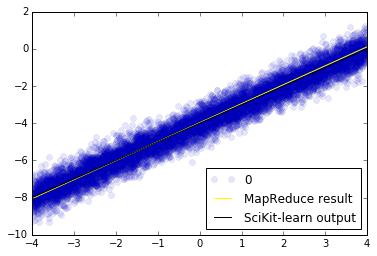

In [41]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import random as rand 

#Randomly sample 1% of our data
n = 1000000 # this is the total number of samples in the dataset
s = int(n*0.01) # take 1% of the sample
filename = "LinearRegression.csv" # sample this out to a CSV file
skip = sorted(rand.sample(xrange(n),n-s))
df = pd.read_csv(filename, skiprows=skip, header=None) # read the data into a DataFrame

#Set up background stuff to plot mapreduce data
floor_x=min(df[1])
ceiling_x=max(df[1])
step_x=(ceiling_x-floor_x)/s
pred_x=np.arange(floor_x,ceiling_x,step_x)

def get_line(x,m,b):
    """ calculate Y values given X, slope, and intercept"""
    return m*x+b

mr_intercept=weights[0]
mr_slope=weights[1]
pred_y_mr=get_line(pred_x,mr_slope,mr_intercept)

#Build Sklearn model
sklearn_model=LinearRegression()
sklearn_model.fit(df[1].reshape(-1,1),df[0])
sk_slope=sklearn_model.coef_
sk_intercept=sklearn_model.intercept_

pred_y_sk=get_line(pred_x,sk_slope,sk_intercept)

#Actually make the plots
plt.plot(df[1],df[0],'bo',alpha=0.1) #Plot data points, with alpha turned down so we can see the lines
plt.plot(pred_x,pred_y_mr,color="yellow", label="MapReduce result") #Plot Mapreduce line
plt.plot(pred_x,pred_y_sk, color="black", label="SciKit-learn output") #Plot Sklearn line
plt.legend(loc="lower right")
plt.show()

# HW6.5.1 (OPTIONAL)

Using MRJob and in Python, plot the error surface for the weighted linear regression model using a heatmap and contour plot. Also plot the current model in the original domain space.  (Plot them side by side if possible)
Plot the path to convergence (during training) for the weighted linear regression model in plot error space and in the original domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, etc. Comment on convergence and on the mean squared error using your weighted OLS algorithm on the weighted dataset versus using the weighted OLS algorithm on the uniformly weighted dataset.


# HW6.6 Clean up notebook for GMM via EM (OPTIONAL)

Using the following notebook as a starting point:
http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/0t7985e40fovlkw/EM-GMM-MapReduce%20Design%201.ipynb 
Improve this notebook as follows:
* Add in equations into the notebook (not images of equations) 
* Number the equations
* Make sure the equation notation matches the code and the code and comments refer to the equations numbers
* Comment the code
* Rename/Reorganize the code to make it more readable
* Rerun the examples similar graphics (or possibly better graphics)


# HW6.7  Implement Bernoulli Mixture Model via EM (OPTIONAL)

Implement the EM clustering algorithm to determine Bernoulli Mixture Model for discrete data in MRJob.

As a unit test use the dataset in the following slides:
https://www.dropbox.com/s/maoj9jidxj1xf5l/MIDS-Live-Lecture-06-EM-Bernouilli-MM-Systems-Test.pdf?dl=0

Cross-check that you get the same cluster assignments and cluster Bernouilli models as presented in the slides after 25 iterations. Dont forget the smoothing.

As a full test: use the same dataset from HW 4.5, the Tweet Dataset. 

Using this data, you will implement a 1000-dimensional EM-based Bernoulli Mixture Model algorithm in MrJob on the users by their 1000-dimensional word stripes/vectors using K = 4.  Use the same smoothing as in the unit test.
Repeat this experiment using your KMeans MRJob implementation fron HW4.
Report the rand index score using the class code as ground truth label for both algorithms and comment on your findings.

Here is some more information on the Tweet Dataset.
Here you will use a different dataset consisting of word-frequency distributions for 1,000 Twitter users. These 

Twitter users use language in very different ways,
and were classified by hand according to the criteria:
* 0: Human, where only basic human-human communication is observed.
* 1: Cyborg, where language is primarily borrowed from other sources
(e.g., jobs listings, classifieds postings, advertisements, etc...).
* 2: Robot, where language is formulaically derived from unrelated sources
(e.g., weather/seismology, police/fire event logs, etc...).
* 3: Spammer, where language is replicated to high multiplicity
(e.g., celebrity obsessions, personal promotion, etc... )

Check out the preprints of  recent research,which spawned this dataset:
http://arxiv.org/abs/1505.04342
http://arxiv.org/abs/1508.01843

The main data lie in the accompanying file:
topUsers_Apr-Jul_2014_1000-words.txt
and are of the form:
USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...
.
.
where
USERID = unique user identifier
CODE = 0/1/2/3 class code
TOTAL = sum of the word counts
Using this data, you will implement a 1000-dimensional K-means algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using several 
centroid initializations and values of K.
